In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

params = {"figure.facecolor": "#cad9e1",
              "axes.facecolor": "#cad9e1",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "#ffffff",
              "grid.linewidth": 2,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#006767', '#ff7f0e', '#2ca02c', '#d62728',
                                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                     '#bcbd22', '#17becf'])}
plt.rcParams.update(params)

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
times = pd.read_csv('data/exodus-times.csv')

times.created_at = pd.to_datetime(times.created_at)

man_burn_times_by_year = {2017: pd.to_datetime('2017-09-02 22:00:00.00000'),
                  2016: pd.to_datetime('2016-09-03 22:00:00.00000'),
                  2015: pd.to_datetime('2015-09-05 22:00:00.00000'),
                  2014: pd.to_datetime('2014-08-30 22:00:00.00000')}

times = times.drop(times.index[4])
times.wait_time_min = pd.to_numeric(times.wait_time_min)

times['year'] = times.created_at.map(lambda r: r.year)
times['man_burn_time'] = times.year.map(lambda year: man_burn_times_by_year[year])
times.hourly_created_at = times.created_at.map(lambda x: x.round(freq='h'))
times['time_until_man_burn'] = times.created_at - times.man_burn_time
times['td_hourly_time_until_man_burn'] = times.hourly_created_at - times.man_burn_time
times['hourly_time_until_man_burn'] = times.td_hourly_time_until_man_burn.map(lambda x: ((x.days * 24) + (x.seconds//3600)))
times['wait_time_in_hour_fractions'] = times.estimated_time /60

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


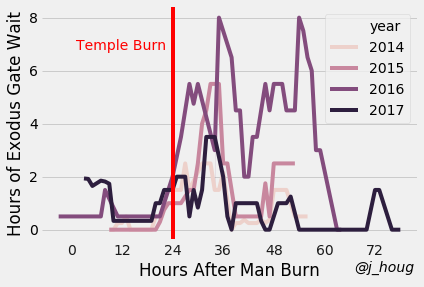

In [3]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_until_man_burn", y="wait_time_in_hour_fractions",
                   hue="year", data=times)
ax.set(xlabel='Hours After Man Burn', ylabel='Hours of Exodus Gate Wait')
ax.set_xticks([0, 12, 24, 36, 48, 60, 72])
plt.axvline(x=24, color='red')
plt.text(1,6.8,'Temple Burn', color='red')
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/exodus-time-by-year.png", bbox_inches='tight')

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


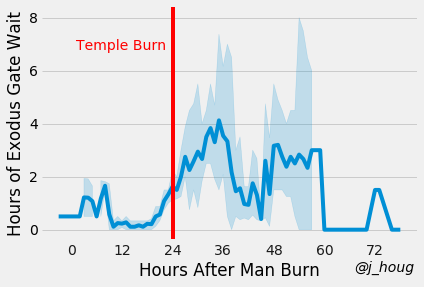

In [4]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_until_man_burn", y="wait_time_in_hour_fractions",
                   data=times)
ax.set(xlabel='Hours After Man Burn', ylabel='Hours of Exodus Gate Wait')
ax.set_xticks([0, 12, 24, 36, 48, 60, 72])
plt.axvline(x=24, color='red')
plt.text(1,6.8,'Temple Burn', color='red')
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/exodus-time-w-error.png", bbox_inches='tight')